# Score distribution exploration
Exploration of the scores resulting from various choices in the conference invitee recommendation algorithm.

In [14]:
import jsonlines
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read in data

In [15]:
with jsonlines.open('../data/conference_rec_output/combined_2016_2024_all_scores_basic_21Feb2024_individual_component_scores.jsonl') as reader:
    individual_scores = [obj for obj in reader]

In [16]:
comp_scores = pd.read_csv('../data/conference_rec_output/combined_2016_2024_all_scores_basic_21Feb2024_composite_scores.csv', index_col=0)
comp_scores.head()

,composite_score
"hansen, lt",1.0
"jeong, wj",1.0
"yost, ck",1.0
"vanderlinde, em",1.0
"khroustalyova, g",1.0


In [17]:
with open('../data/conference_rec_output/combined_2016_2024_all_scores_basic_21Feb2024_top_0.05_candidates.txt') as myf:
    candidates = [cand.strip() for cand in myf.readlines()]

## Plot distribution

<Axes: ylabel='Density'>

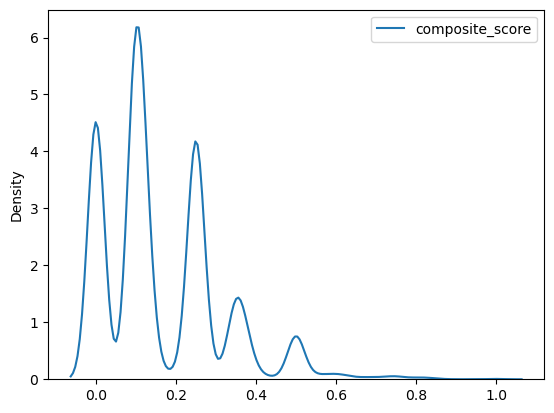

In [18]:
sns.kdeplot(comp_scores)

In [19]:
ind_scores_sep = {
    'co_citation': [sc['co_citation'] for sc in individual_scores],
    'co_author': [sc['co_author'] for sc in individual_scores],
    'topic': [sc['topic'] for sc in individual_scores],
    'geography': [sc['geography'] for sc in individual_scores]
}

In [20]:
set(ind_scores_sep['geography'])

{0, 0.3976911170349988, 0.5, 1}

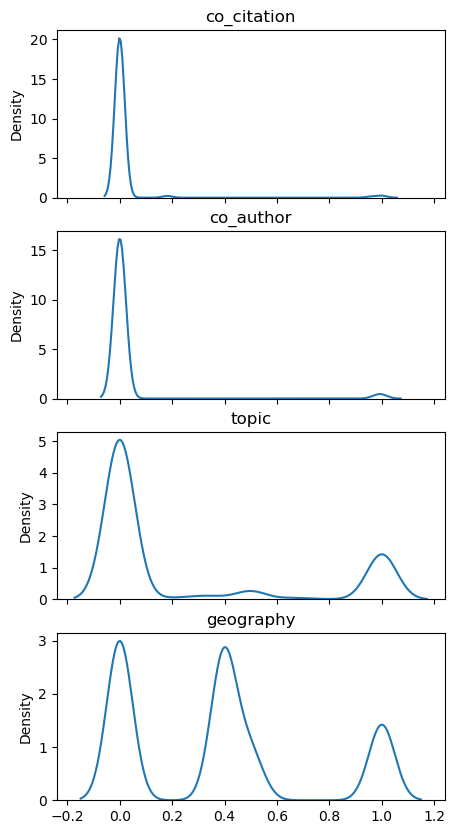

In [21]:
fig, axs = plt.subplots(4, 1, figsize=(5,10), sharex=True)

for ax, sc_name in zip(axs, ['co_citation', 'co_author', 'topic', 'geography']):
    
    sns.kdeplot(ind_scores_sep[sc_name], ax=ax)
    ax.set_title(sc_name)